<a href="https://colab.research.google.com/github/rehmanaly0051/Exterior-Design-Model/blob/main/On_Cubicasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip show huggingface_hub

Name: huggingface-hub
Version: 0.30.2
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, peft, sentence-transformers, timm, tokenizers, transformers


In [3]:
!pip show diffusers

Name: diffusers
Version: 0.32.2
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/diffusers/graphs/contributors)
Author-email: diffusers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [4]:
!pip show transformers

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [5]:
import torch
print(torch.version.cuda)

12.4


In [8]:
!apt update
!apt install -y nvidia-driver-535

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,868 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu 

In [7]:
!pip install -U xformers --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Fo

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
34 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

Saving cubicasa5k.png to cubicasa5k.png
🎨 Generating Exterior Views...



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:25<01:17, 25.88s/it]

✅ Generated Front View


  0%|          | 0/40 [00:00<?, ?it/s]

 50%|█████     | 2/4 [00:51<00:51, 25.67s/it]

✅ Generated Back View


  0%|          | 0/40 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [01:16<00:25, 25.42s/it]

✅ Generated Left View


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 4/4 [01:41<00:00, 25.34s/it]

✅ Generated Right View



🎯 All views combined and saved as final_exterior_views.png successfully!


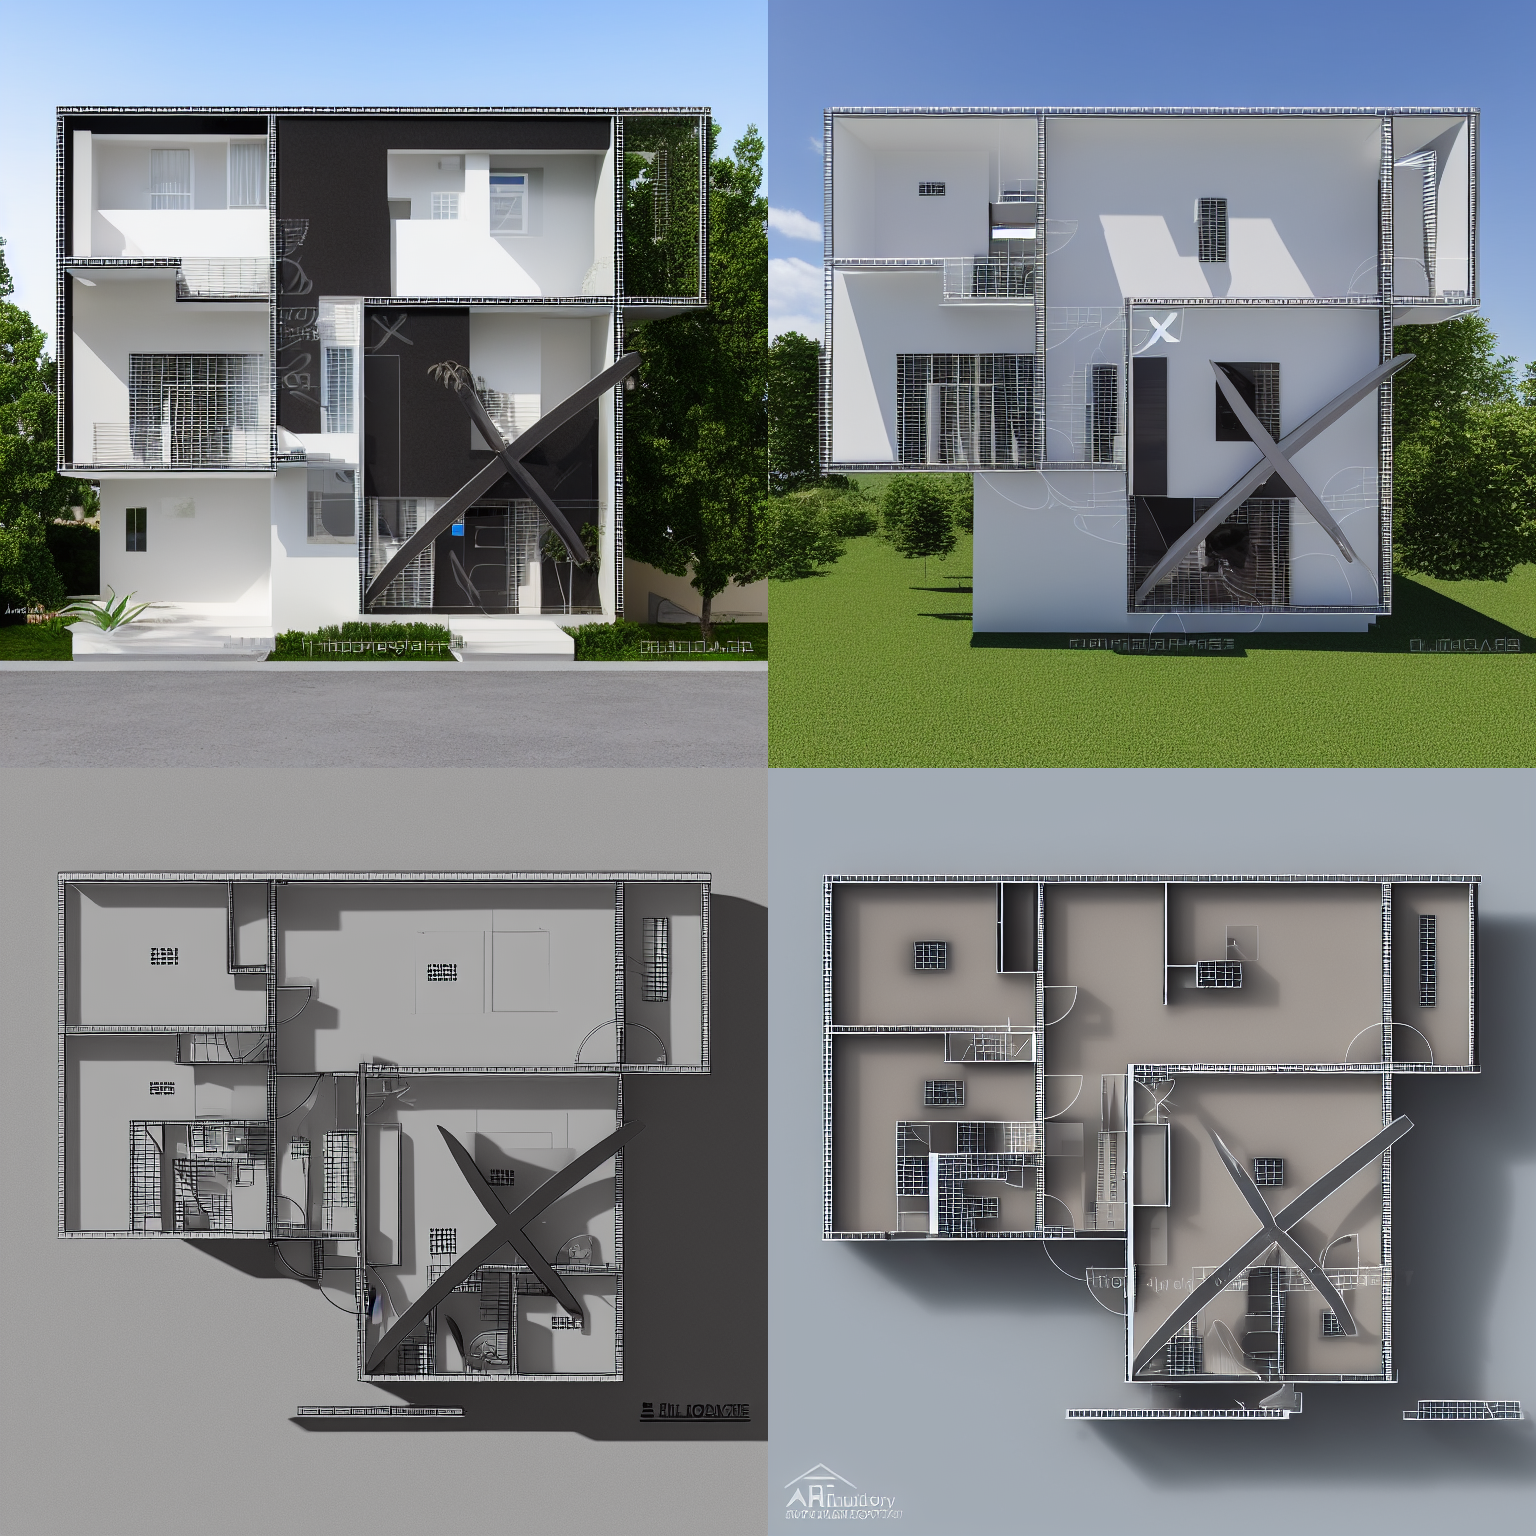

In [7]:
import warnings
warnings.filterwarnings('ignore')  # Ignore irrelevant warnings

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import cv2
import numpy as np
from PIL import Image
import random
import os
from tqdm import tqdm  # progress bar

from google.colab import files
from IPython.display import display

# ===============================
# 🚀 STEP 2: Preprocess uploaded floorplan image
# ===============================
def preprocess_floor_plan(floor_plan_path, output_size=(768, 768)):
    """Process floor plan image for ControlNet input."""
    image = cv2.imread(floor_plan_path)
    if image is None:
        raise ValueError(f"Could not load image from {floor_plan_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize and pad
    h, w = image.shape[:2]
    ratio = min(output_size[0] / w, output_size[1] / h)
    new_size = (int(w * ratio), int(h * ratio))
    resized = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    canvas = np.ones((output_size[1], output_size[0], 3), dtype=np.uint8) * 255
    offset_x = (output_size[0] - new_size[0]) // 2
    offset_y = (output_size[1] - new_size[1]) // 2
    canvas[offset_y:offset_y+new_size[1], offset_x:offset_x+new_size[0]] = resized

    gray = cv2.cvtColor(canvas, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    kernel = np.ones((2, 2), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    edge_image = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2RGB)

    return Image.fromarray(edge_image)

# ===============================
# 🚀 STEP 3: Load models
# ===============================
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# Install CUDA drivers if needed before enabling offloading
!apt update
!apt install -y nvidia-driver-535
pipe.enable_model_cpu_offload() # Enable CPU offloading after installing drivers
pipe.enable_xformers_memory_efficient_attention()

# ===============================
# 🚀 STEP 4: Upload Floorplan
# ===============================
uploaded = files.upload()
floor_plan_filename = list(uploaded.keys())[0]

# Preprocess the floorplan
control_image = preprocess_floor_plan(floor_plan_filename)

# ===============================
# 🚀 STEP 5: Setup prompts
# ===============================
views = {
    "Front": "Front exterior view of a modern minimalist house, realistic, 8K HDR, ultra photorealistic, based on floorplan",
    "Back": "Back exterior view of a modern minimalist house, realistic, 8K HDR, ultra photorealistic, based on floorplan",
    "Left": "Left side view of a modern minimalist house, realistic, 8K HDR, ultra photorealistic, based on floorplan",
    "Right": "Right side view of a modern minimalist house, realistic, 8K HDR, ultra photorealistic, based on floorplan",
}

negative_prompt = "low quality, blurry, distorted, ugly, bad design"

single_view_size = (768, 768)
generated_views = {}

# ===============================
# 🚀 STEP 6: Generate Views
# ===============================
print("🎨 Generating Exterior Views...\n")
for view_name, view_prompt in tqdm(views.items()):
    seed = random.randint(0, 100000)
    generator = torch.manual_seed(seed)

    output = pipe(
        prompt=view_prompt,
        negative_prompt=negative_prompt,
        image=control_image,
        num_inference_steps=40,
        guidance_scale=7.5,
        generator=generator,
    )

    image = output.images[0]
    generated_views[view_name] = image

    print(f"✅ Generated {view_name} View")

# ===============================
# 🚀 STEP 7: Combine Views into Collage
# ===============================
collage_width = single_view_size[0] * 2
collage_height = single_view_size[1] * 2
collage = Image.new('RGB', (collage_width, collage_height), color=(255, 255, 255))

collage.paste(generated_views["Front"], (0, 0))
collage.paste(generated_views["Back"], (single_view_size[0], 0))
collage.paste(generated_views["Left"], (0, single_view_size[1]))
collage.paste(generated_views["Right"], (single_view_size[0], single_view_size[1]))

# Save and display
final_output_path = "final_exterior_views.png"
collage.save(final_output_path)

print(f"\n🎯 All views combined and saved as {final_output_path} successfully!")

# Show the final collage
display(collage)